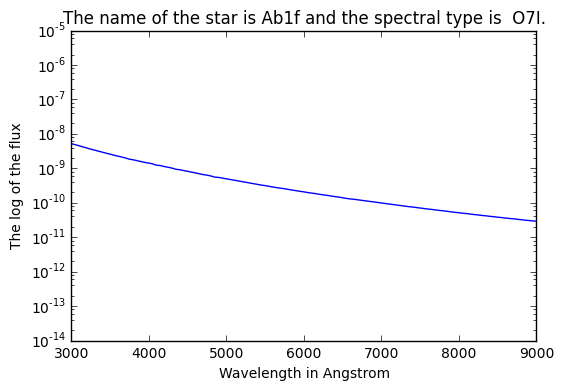

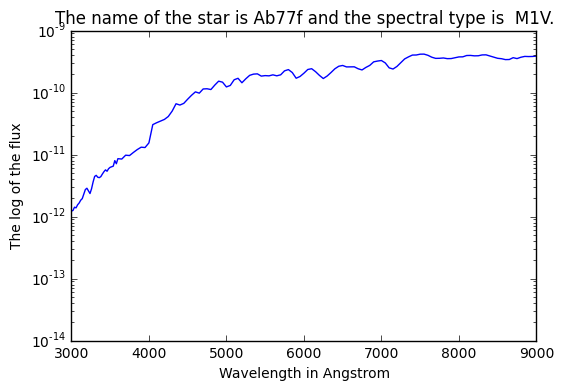

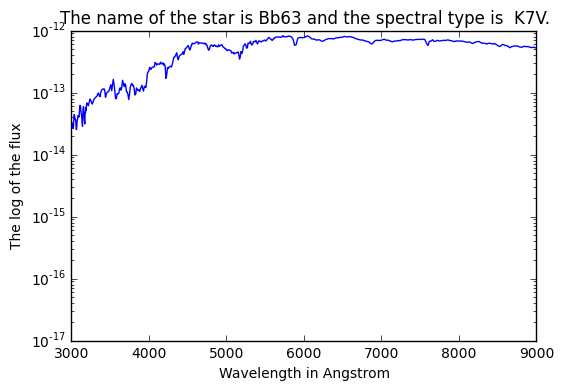

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sp
from astropy.io import fits
%matplotlib inline

def read(name):
    #reads csv file
    return(pd.read_table(name,sep = ','))

def calculating(name1, name2, name3):
    #function that reads in csv file, then looks what its spectra type is, then normalises the flux and returns the title + the wavelength and flux.
    wavelength_and_flux = read(name1)
    spectra = read("Data/spectra.list.csv")
    
    # Series are directly iterable (like a list)
    j = 0
    for i in spectra['#filename']:
        j = j + 1
        if(i == name2):
            type_name = spectra[' type'][j]
       
    #genormaliseerd flux
    wavelength_and_flux[' flux'] = wavelength_and_flux[' flux']/wavelength_and_flux.sum(axis = 1)
    
    return("The name of the star is " + name3 + " and the spectral type is " + type_name + ".", wavelength_and_flux['# wavelength'], wavelength_and_flux[' flux'])

def plot(title, x, y):
    #function to plot
    plt.plot(x, y)
    plt.yscale("log")
    plt.ylabel("The log of the flux")
    plt.xlabel("Wavelength in Angstrom")
    plt.xlim(3000,9000)
    plt.title(title)
    plt.show()

#Question 1
a, b, c = calculating("Data/Ab1f.dat.fix", "Ab1f.dat.fix", "Ab1f")
plot(a, b, c)

a, b, c = calculating("Data/Ab77f.dat.fix", "Ab77f.dat.fix", "Ab77f")
plot(a, b, c)

a, b, c = calculating("Data/Bb63.dat.fix", "Bb63.dat.fix", "Bb63")
plot(a, b, c)

In [40]:
'''
import seaborn as sns
import mpld3
from bokeh.models import Title
from bokeh.plotting import figure, output_file, show, output_notebook
output_notebook()
mpld3.enable_notebook()

def plotbokeh(title, x, y):#plots file with bokeh
    #Plotting with Bokeh(trying it out)
    p = figure(title=title, y_axis_type="log", x_range=(3000, 9000), y_range=(10**-14, 10**-2))
    p.line(x=x, y=y)
    p.add_layout(Title(text="The log of the flux", align="center"), "left")
    p.add_layout(Title(text="Wavelength in Angstrom", align="center"), "below")
    p.grid.grid_line_color = None
    show(p, notebook_handle=True)
    
a, b, c = calculating("Ab1f.dat.fix")
plotbokeh(a, b, c)

a, b, c = calculating("Ab77f.dat.fix")
plotbokeh(a, b, c)

a, b, c = calculating("Bb63.dat.fix")
plotbokeh(a, b, c)
'''

'\nimport seaborn as sns\nimport mpld3\nfrom bokeh.models import Title\nfrom bokeh.plotting import figure, output_file, show, output_notebook\noutput_notebook()\nmpld3.enable_notebook()\n\ndef plotbokeh(title, x, y):#plots file with bokeh\n    #Plotting with Bokeh(trying it out)\n    p = figure(title=title, y_axis_type="log", x_range=(3000, 9000), y_range=(10**-14, 10**-2))\n    p.line(x=x, y=y)\n    p.add_layout(Title(text="The log of the flux", align="center"), "left")\n    p.add_layout(Title(text="Wavelength in Angstrom", align="center"), "below")\n    p.grid.grid_line_color = None\n    show(p, notebook_handle=True)\n    \na, b, c = calculating("Ab1f.dat.fix")\nplotbokeh(a, b, c)\n\na, b, c = calculating("Ab77f.dat.fix")\nplotbokeh(a, b, c)\n\na, b, c = calculating("Bb63.dat.fix")\nplotbokeh(a, b, c)\n'

2.
a)An Angstrom($\si{\angstrom}$) is 10$^{-10}$ m.
b)The unit of flux density is in SI units W/m$^2$ and another unit can be the Jansky.
c)

In [201]:
#Question 3 a
iets = read('Data/vega.fnu.csv')
iets['#wavelength'] = iets['#wavelength'] * 10
wavelength = iets['#wavelength']

iets.flux = iets.flux*3e18/(wavelength**2)
Flux = iets.flux
name_filter = ["U", "B", "V"]
lambd_0 = [3659, 4582, 5448]
lambd_delta = [660, 940, 880]
l = []

for i in range(3):
    lamnieuw = np.linspace(lambd_0[i]-lambd_delta[i]/2,lambd_0[i]+lambd_delta[i]/2, 100)
    Fnieuw = np.interp(lamnieuw, wavelength, Flux)
    Cx = 2.5 * np.log10(np.trapz( Fnieuw * lamnieuw, lamnieuw )/ np.trapz(lamnieuw,lamnieuw))
    Mag = -2.5 * np.log10( np.trapz( Fnieuw * lamnieuw, lamnieuw )/ np.trapz(lamnieuw,lamnieuw) ) + Cx
    l.append(Cx)
print(l)

[-20.906037214965792, -20.600456877808334, -21.10453294444136]


/usr/lib64/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


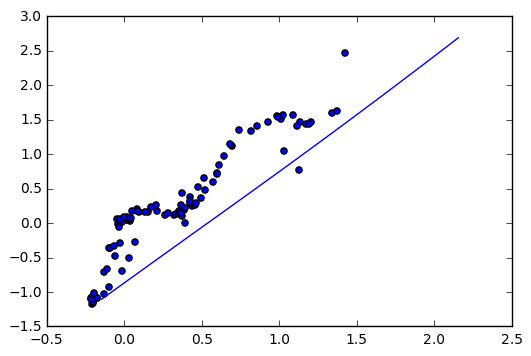

In [202]:
#Question 3 a and b
def m_x(lambd_0,lambd_delta,C_x,iets1):
    lamnieuw = np.linspace(lambd_0-lambd_delta/2,lambd_0+lambd_delta/2, 100)
    Fnieuw = np.interp(lamnieuw, iets1['# wavelength'], iets1[' flux'] )
    return(-2.5 * np.log10( np.trapz( Fnieuw * lamnieuw, lamnieuw )/ np.trapz(lamnieuw,lamnieuw) ) + C_x)

def planck(lambd_0, lambd_delta, T):
    h = 6.626e-34
    c = 3.00e18
    k_B = 1.38e-23
    lamnieuw = np.linspace(lambd_0-lambd_delta/2,lambd_0+lambd_delta/2, 100)
    return((2*h*(c**2)/(lamnieuw**5))*(1/(np.exp((h*c)/(lamnieuw*k_B*T))-1)))

def m_x1(lambd_0,lambd_delta,C_x,iets1,Fnieuw):
    lamnieuw = np.linspace(lambd_0-lambd_delta/2,lambd_0+lambd_delta/2, 100)
    return(-2.5 * np.log10( np.trapz( Fnieuw * lamnieuw, lamnieuw )/ np.trapz(lamnieuw,lamnieuw) ) + C_x)

T = np.arange(2000, 30100, 100)

spectra = read("Data/spectra.list.csv")

j = 0

B_V = []
U_B = []

for i in spectra['#filename']:
    i = "Data/" + i
    iets1 = read(i)
    
    type_name = spectra[' type'][j]

    U = m_x(lambd_0[0],lambd_delta[0],l[0],iets1)
    B = m_x(lambd_0[1],lambd_delta[1],l[1],iets1)
    V = m_x(lambd_0[2],lambd_delta[2],l[2],iets1) 
    B_V.append(B-V)
    U_B.append(U-B)
    
    #print("For filter ", name_filter[0],",and the star", i, ", the magnitude is",m_x(lambd_0[0],lambd_delta[0],l[0],iets1))
    #print("For filter ", name_filter[1],",and the star", i, ", the magnitude is",m_x(lambd_0[1],lambd_delta[1],l[1],iets1))
    #print("For filter ", name_filter[2],",and the star", i, ", the magnitude is",m_x(lambd_0[2],lambd_delta[2],l[2],iets1))
    plt.scatter(m_x(lambd_0[1],lambd_delta[1],l[1],iets1)-m_x(lambd_0[2],lambd_delta[2],l[2],iets1), m_x(lambd_0[0],lambd_delta[0],l[0],iets1)-m_x(lambd_0[1],lambd_delta[1],l[1],iets1))
     
B_V = np.asarray(B_V)
U_B = np.asarray(U_B)
    
B_VT = []
U_BT = []

#print(m_x1(lambd_0[0],lambd_delta[0],l[0],iets1, planck(lambd_0[0],lambd_delta[0], T[260])))


for i in range(len(T)):
    UT = m_x1(lambd_0[0],lambd_delta[0],l[0],iets1, planck(lambd_0[0],lambd_delta[0], T[i]))
    BT = m_x1(lambd_0[1],lambd_delta[1],l[1],iets1, planck(lambd_0[1],lambd_delta[1], T[i]))
    VT = m_x1(lambd_0[2],lambd_delta[2],l[2],iets1, planck(lambd_0[2],lambd_delta[2], T[i]))
    
    B_VT.append(BT - VT)
    U_BT.append(UT - BT)
    
B_VT = np.asarray(B_VT)
U_BT = np.asarray(U_BT)

plt.plot(B_VT, U_BT)

281
B0 28000
A0 10000
G0 6300
F0 7500


/usr/lib64/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


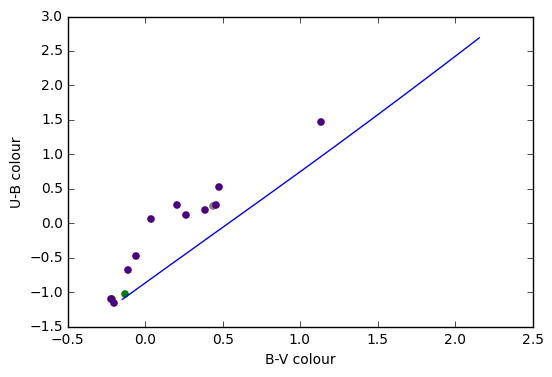

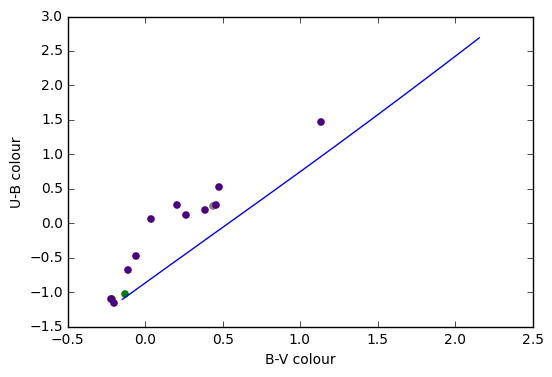

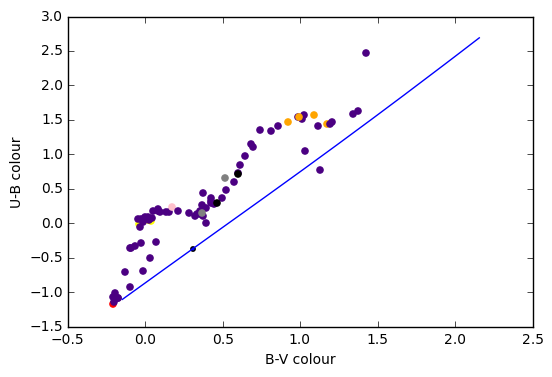

In [153]:
#Plots 3 b
j = 0
for i in spectra['#filename']:
    i = "Data/" + i
    iets1 = read(i)
    
    type_name = spectra[' type'][j]
    
    if "I" in type_name:
        if(type_name == " B0I"):
            plt.scatter(B_V[j], U_B[j], color=['green'])
            plt.figure(0)
        elif(type_name == " G0I"):
            plt.scatter(B_V[j], U_B[j],color=['grey'])
            plt.figure(0)
        elif(type_name == " F0I"):
            plt.scatter(B_V[j], U_B[j],color=['pink'])
            plt.figure(0)
        else:
            plt.scatter(B_V[j], U_B[j], color = ['indigo'])
            plt.figure(0)
    else:
        if(type_name == " O5V"):
            plt.scatter(B_V[j], U_B[j],color=['red'])
            plt.figure(1)
        elif(type_name == " B0V"):
            plt.scatter(B_V[j], U_B[j],color=['green'])
            plt.figure(1)
        elif(type_name == " A0V"):
            plt.scatter(B_V[j], U_B[j],color=['yellow'])
            plt.figure(1)
        elif(type_name == " G0V"):
            plt.scatter(B_V[j], U_B[j],color=['grey'])
            plt.figure(1)
        elif(type_name == " K0V"):
            plt.scatter(B_V[j], U_B[j],color=['black'])
            plt.figure(1)
        elif(type_name == " M0V"):
            plt.scatter(B_V[j], U_B[j],color=['orange'])
            plt.figure(1)
        else:
            plt.scatter(B_V[j], U_B[j], color = ['indigo'])
            plt.figure(1)
    
    j = j + 1
    plt.xlabel("B-V colour")
    plt.ylabel("U-B colour")
plt.plot(B_VT, U_BT)
plt.figure(0)
plt.plot(B_VT, U_BT)
plt.figure(1)

print(len(T))
print("B0",T[260])
print("A0",T[80])
print("G0",T[43])
print("F0",T[55])
plt.scatter(B_VT[55], U_BT[55], s=10)
plt.figure(0)

[ 0.04020707 -0.00710324  0.03470731  0.05059855  0.01744079 -0.27176452
  0.06453929  0.0580363   0.06673262  0.20061051  0.08005335  0.09418399
  0.16293514  0.1696971   0.1601234   0.156191    0.17867811 -0.93052357
 -1.02646968 -1.09390615 -1.06596049 -1.00798754 -0.71569662 -0.69508954
 -0.67331757 -0.35959939 -0.36640794 -0.50293313 -0.48246055 -0.28387746
 -0.3370894  -0.05833374  0.08978806  0.22820998  0.26452839  0.12402632
  0.1824905   0.11077178  0.12894037  0.14609427  0.13815277  0.43513931
  0.18596316  0.17158827  0.10249543  0.26804385  0.21791493  0.00560508
  0.65917171  0.25199669  0.14569005  0.281925    0.83887891  0.26707046
  0.29713226  0.37210386  0.36328197  0.32570783  0.47708089  1.34330788
  0.52453348  0.59453428  0.72172625  0.70693974  0.29025338  1.11215907
  0.96957618  1.15412043  1.40351171  1.50520399  1.54807774  1.35438149
  1.57210636  1.56623504  1.4697694   1.54314121  1.43752323  2.47418727
  1.46577357  1.47070858  1.41587926  1.44068101  0

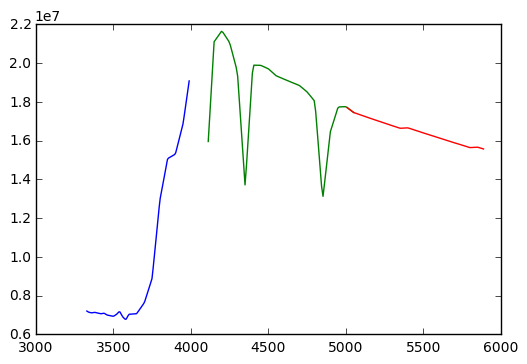

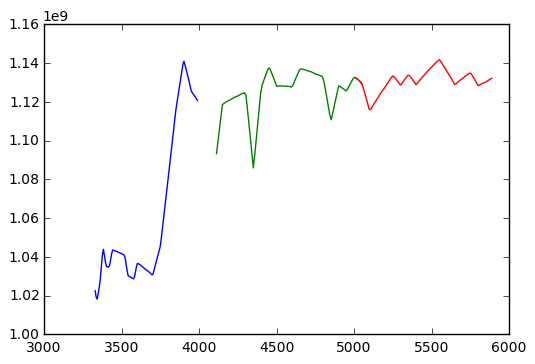

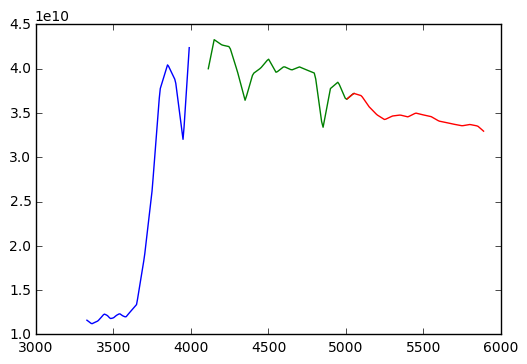

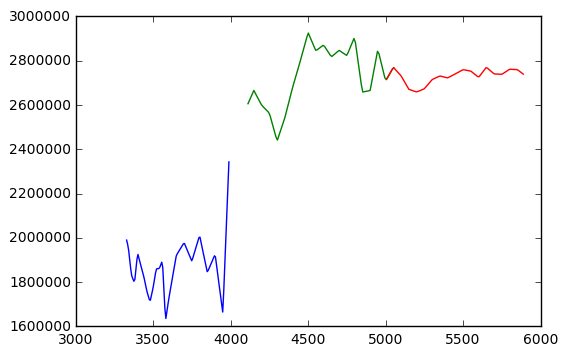

In [200]:
#Question 4
def spectra4(k, lambd_0, lambd_delta):
    y = planck(lambd_0,lambd_delta, T[k])
    lamnieuw = np.linspace(lambd_0-lambd_delta/2,lambd_0+lambd_delta/2, 100)
    Fnieuw = np.interp(lamnieuw, iets1['# wavelength'], iets1[' flux'])
    return(Fnieuw/y, lamnieuw)

def planck2(lamnieuw, T):
    h = 6.626e-34
    c = 3.00e18
    k_B = 1.38e-23
    return((2*h*(c**2)/(lamnieuw*5))*(1/(np.exp((h*c)/(lamnieuw*k_B*T))-1))) 
    
def fullspectra(k, read1, read2):
    y = planck2(read1, T[k])
    lamnieuw = read1
    Fnieuw = read2
    return(Fnieuw/y, lamnieuw)
 
print(U_B)
t = 0
s = 0
r = 0
j = 0

for i in spectra['#filename']:
    i = "Data/" + i
    iets1 = read(i)
    
    type_name = spectra[' type'][j]
    
    if(type_name == " B0I"):
        USpec, Ulam = spectra4(260, lambd_0[0], lambd_delta[0])
        BSpec, Blam = spectra4(260, lambd_0[1], lambd_delta[1])
        VSpec, Vlam = spectra4(260, lambd_0[2], lambd_delta[2])
        plt.plot(Ulam, USpec)
        plt.plot(Blam, BSpec)
        plt.plot(Vlam, VSpec)
        y, x = fullspectra(260, iets1['# wavelength'], iets1[' flux'])
        #plt.plot(x, y)
        plt.show()
    elif((type_name == " A0V") and (r == 0)):
        USpec, Ulam = spectra4(80, lambd_0[0], lambd_delta[0])
        BSpec, Blam = spectra4(80, lambd_0[1], lambd_delta[1])
        VSpec, Vlam = spectra4(80, lambd_0[2], lambd_delta[2])
        plt.plot(Ulam, USpec)
        plt.plot(Blam, BSpec)
        plt.plot(Vlam, VSpec)
        y, x = fullspectra(80, iets1['# wavelength'], iets1[' flux'])
        #plt.plot(x, y)        
        plt.show()
        r = r + 1
    elif((type_name == " F0I") and (s == 0)) :
        USpec, Ulam = spectra4(55, lambd_0[0], lambd_delta[0])
        BSpec, Blam = spectra4(55, lambd_0[1], lambd_delta[1])
        VSpec, Vlam = spectra4(55, lambd_0[2], lambd_delta[2])
        plt.plot(Ulam, USpec)
        plt.plot(Blam, BSpec)
        plt.plot(Vlam, VSpec)
        y, x = fullspectra(55, iets1['# wavelength'], iets1[' flux'])
        #plt.plot(x, y)        
        plt.show()        
        s = s + 1
    elif((type_name == " G0V") and (t == 0)):
        USpec, Ulam = spectra4(43, lambd_0[0], lambd_delta[0])
        BSpec, Blam = spectra4(43, lambd_0[1], lambd_delta[1])
        VSpec, Vlam = spectra4(43, lambd_0[2], lambd_delta[2])
        plt.plot(Ulam, USpec)
        plt.plot(Blam, BSpec)
        plt.plot(Vlam, VSpec)
        y, x = fullspectra(43, iets1['# wavelength'], iets1[' flux'])
        #plt.plot(x, y)        
        plt.show()        
        t = t + 1
    
    j = j + 1

In [206]:
#Question 5

imageB = fits.getdata('Data/exposure_B.fits')
imageV = fits.getdata('Data/exposure_V.fits')

[x1, y1, flux1, sharpness1, roundness1] = sp.find(imageB, 53.1196*4, 5.)
[x2, y2, flux2, sharpness2, roundness2] = sp.find(imageV, 50.9229*4, 5.)

#print(sp.aper(imageB, x, y, 5, 5, skyrad = [-100,200], badpix = [0,0], readnoise = 250, flux = True))

In [187]:
#Question 6

def SN(N_s, k, N_sk):
    g = 5
    RON = 250
    return((g * N_s)/np.sqrt(g*N_s + k*(g*N_sk + RON**2)))